In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [208]:
df=pd.read_csv('churn.csv')

In [209]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [210]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

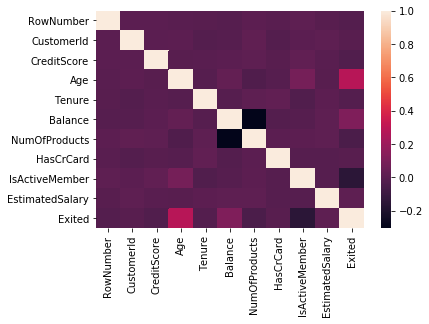

In [211]:
sns.heatmap(df.corr())

In [212]:
df=df.drop(['CustomerId','Surname',],axis=1)

In [213]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
df.corr()['EstimatedSalary'].sort_values()

IsActiveMember    -0.011421
HasCrCard         -0.009933
Age               -0.007201
RowNumber         -0.005988
CreditScore       -0.001384
Tenure             0.007784
Exited             0.012097
Balance            0.012797
NumOfProducts      0.014204
EstimatedSalary    1.000000
Name: EstimatedSalary, dtype: float64

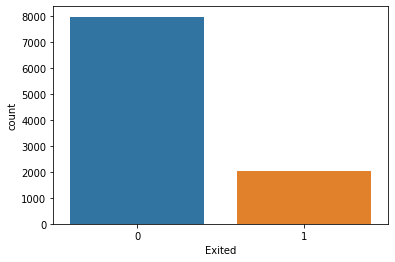

In [215]:
sns.countplot(df['Exited'])

In [216]:
d1=df.groupby('Exited').mean()['Tenure']

In [217]:
print(d1)

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64


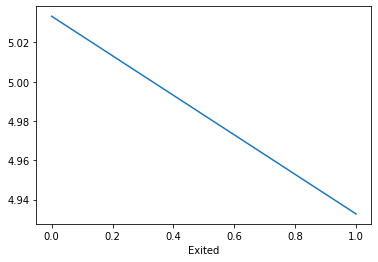

In [218]:
d1.plot()

In [219]:
pd.get_dummies(df['Gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [220]:
sex=pd.get_dummies(df['Gender'],drop_first=True)

In [221]:
sex

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [222]:
df=pd.concat([df,sex],axis=1)

In [223]:
df=df.drop('Gender',axis=1)

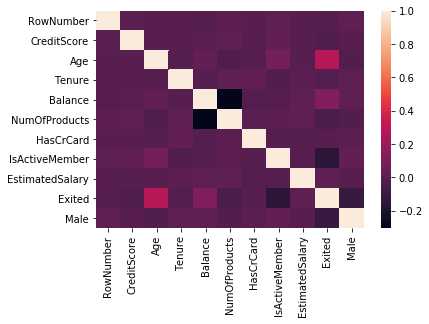

In [224]:
sns.heatmap(df.corr())

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X=df.drop(['Exited','Geography'],axis=1).values

In [227]:
y=df['Exited'].values

In [228]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
scaler=MinMaxScaler()

In [231]:
X_train=scaler.fit_transform(X_train)

In [232]:
X_train.shape

(6700, 10)

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

In [156]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [233]:
model=Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
210/210 [==============================] - 1s 4ms/step - loss: 0.5621 - val_loss: 6818.1587
Epoch 2/200
210/210 [==============================] - 1s 3ms/step - loss: 0.4922 - val_loss: 5763.1592
Epoch 3/200
210/210 [==============================] - 1s 2ms/step - loss: 0.4859 - val_loss: 5784.1499
Epoch 4/200
210/210 [==============================] - 1s 3ms/step - loss: 0.4774 - val_loss: 5891.0708
Epoch 5/200
210/210 [==============================] - 1s 3ms/step - loss: 0.4664 - val_loss: 5654.2861
Epoch 6/200
197/210 [===========================>..] - ETA: 0s - loss: 0.4574

In [198]:
model_loss=pd.DataFrame(model.history.history)

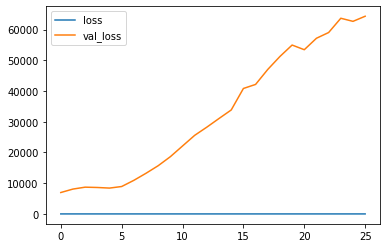

In [199]:
model_loss.plot()

In [200]:
predictions=model.predict_classes(X_test)

In [201]:
from sklearn.metrics import classification_report,confusion_matrix

In [202]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2620
           1       0.21      1.00      0.34       680

    accuracy                           0.21      3300
   macro avg       0.60      0.50      0.17      3300
weighted avg       0.84      0.21      0.07      3300



In [203]:
print(confusion_matrix(y_test,predictions))

[[   2 2618]
 [   0  680]]


In [165]:
383+84

467

In [166]:
2536+297

2833

In [167]:
2833/467

6.0663811563169165